# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

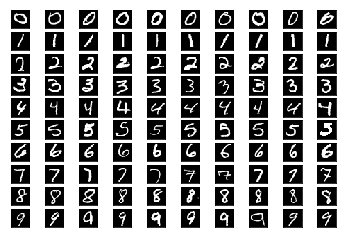

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    fig, ax = plt.subplots(num_examples, num_examples)   #subplots
    for i in range(0, num_examples):  
        data = mini_train_data[mini_train_labels == str(i)]  #selecting data that has labels equal to the number that we want
        for j in range(num_examples):
            random = data[np.random.randint(0, len(data))]  ## pick random datapoints from "data"
            pix = random.reshape((28,28))    #reshape 1D into 2D matrix

            ax[i,j].imshow(pix,cmap = 'gray')  #display image
            ax[i,j].set_xticks([])    #get rid of axis ticks
            ax[i,j].set_yticks([])    

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
from sklearn.metrics import accuracy_score
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)        
        model.fit(mini_train_data, mini_train_labels)   #fit model on mini training data and mini training labels
        dev_predicted_labels = model.predict(dev_data)     #predict dev labels based on dev data
        acc_score = accuracy_score(dev_labels, dev_predicted_labels) 
        
        if k ==1:
            print (classification_report(dev_labels, dev_predicted_labels))  #produce precision, recall, and F1
        print ("The performance for k = " + str(k) +  " is " + str(acc_score))
        

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

The performance for k = 1 is 0.884
The performance for k = 3 is 0.876
The performance for k = 5 is 0.882
The performance for k = 7 is 0.877
The performance for k = 9 is 0.875


ANSWER:
The model does decently well. For each k-value, it predicts digit labels correctly approximately 87% of the time. 

The precision, recall, and f1 score for k=1 are shown above. Because F1 is a metric that combines the precision and recall metrics, we know that if  F1 is high, then both the precision and recall of our K-Nearest Neighbors classifier imply good results. For our classifier, the most difficult digit is the digit 8.   The digit 8 has the lowest f1 score, meaning that either the precision or the recall is problematic, or both. 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, acc1):

### STUDENT START ###
    k = 1
    for i in train_sizes:    #for each train size..
        start = time.time()
        sample_train_data = train_data[0:i]      #set the training data 
        sample_train_labels = train_labels[0:i]

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(sample_train_data, sample_train_labels)
        
        dev_predicted_labels = model.predict(dev_data)
        end = time.time()
        total_time = end - start
        print ("Total time for training set size " + str(i) + ": " + str(total_time))
        
        class_report = classification_report(dev_labels, dev_predicted_labels, output_dict=True)
        print ("Dev set accuracy for training set size " + str(i) + ": " + str(class_report['accuracy']))
        acc1 = np.append(acc1,class_report["accuracy"])
    return acc1
        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
a = P3(train_sizes, accuracies)


Total time for training set size 100: 0.21741914749145508
Dev set accuracy for training set size 100: 0.702
Total time for training set size 200: 0.5470371246337891
Dev set accuracy for training set size 200: 0.791
Total time for training set size 400: 0.7159316539764404
Dev set accuracy for training set size 400: 0.811
Total time for training set size 800: 1.5591893196105957
Dev set accuracy for training set size 800: 0.866
Total time for training set size 1600: 2.9080309867858887
Dev set accuracy for training set size 1600: 0.905
Total time for training set size 3200: 6.108502626419067
Dev set accuracy for training set size 3200: 0.927
Total time for training set size 6400: 11.90877389907837
Dev set accuracy for training set size 6400: 0.939
Total time for training set size 12800: 24.268778562545776
Dev set accuracy for training set size 12800: 0.952
Total time for training set size 25600: 52.36767911911011
Dev set accuracy for training set size 25600: 0.963


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

The R^2 of the regression model is 0.4177006634161019
The predicted accuracies for the training set sizes 60000, 120000 and 1000000 respectively:  [[1.23617317]
 [1.63742805]
 [7.52249967]]


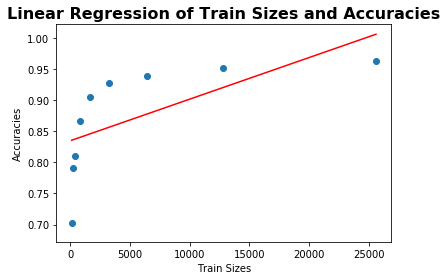

The R^2 of the log regression model is 0.9068304252436642
The predicted accuracies for the training set sizes 60000, 120000 and 1000000 respectively using the log model:  [[1.03358792]
 [1.06432125]
 [1.15833125]]


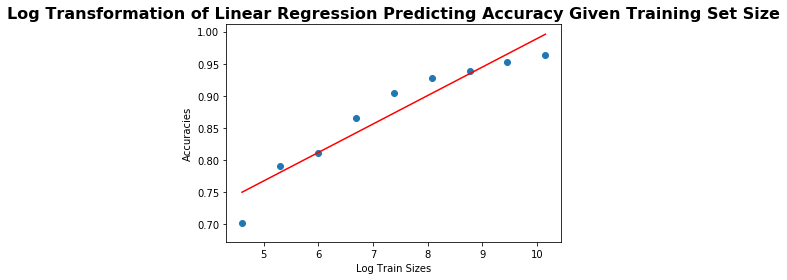

In [6]:
def P4():

### STUDENT START ###
    
    reshaped_train_sizes = np.array(train_sizes).reshape(-1,1)
  
    lin_model = LinearRegression().fit(reshaped_train_sizes, np.array(a).reshape(-1,1))
    predicted_accuracy = lin_model.predict(np.array([60000, 120000, 1000000]).reshape(-1,1))
    r2_model= lin_model.score(reshaped_train_sizes, a)  
    print ("The R^2 of the regression model is " + str(r2_model))
    print ("The predicted accuracies for the training set sizes 60000, 120000 and 1000000 respectively:  " + str(predicted_accuracy))
    
    
    
    #scatterplot of train sizes up to 25k and actual accuracies
    plt.scatter(reshaped_train_sizes, a)
    
    #lineplot of train sizes up to 25k and predicted accuracies for those train sizes
    plt.plot(reshaped_train_sizes, lin_model.predict(reshaped_train_sizes), color = 'r') 
    plt.title("Linear Regression of Train Sizes and Accuracies", fontsize=16, fontweight='bold')
    plt.xlabel("Train Sizes")
    plt.ylabel("Accuracies")
    plt.show()
    
    
    ##log transformation
    log_reshaped_train_sizes = (np.log(reshaped_train_sizes))
    
    log_lin_model = LinearRegression().fit(log_reshaped_train_sizes, np.array(a).reshape(-1,1))
    log_predicted_accuracy = log_lin_model.predict(np.log(np.array([60000, 120000, 1000000])).reshape(-1,1))
    r2_log = log_lin_model.score(log_reshaped_train_sizes, a)
    print ("The R^2 of the log regression model is " + str(r2_log))
    print ("The predicted accuracies for the training set sizes 60000, 120000 and 1000000 respectively using the log model:  " + str(log_predicted_accuracy))
    
    

    plt.scatter(log_reshaped_train_sizes, a)
    plt.plot(log_reshaped_train_sizes, log_lin_model.predict(log_reshaped_train_sizes), color = 'r')
    plt.title("Log Transformation of Linear Regression Predicting Accuracy Given Training Set Size", fontsize=16, fontweight='bold')
    plt.xlabel("Log Train Sizes")
    plt.ylabel("Accuracies")
    plt.show()
    


### STUDENT END ###

  
    
P4()

ANSWER:
I plotted the actual accuracies for the training sizes as blue dots. The red line is the regression line. As we can see with the regression line, it is a linear line that predicts that accuracies will continue to increase as train sizes increase. However, the problem with this is that acccuracies cannot go above 100%, so having accuracies continue to increase above 1 will not make sense. To fix this, I used a log transformation to transform our skewed data so that it would be within the range that we want. While the accuracies that our log model predicts for train sizes 60k, 120k, and 1 million are above 1, they are only slightly above 1. This means that our log transformation was able to scale our data the way we wanted to by keeping the accuracies close to 1 (since the goal was to have the accuracies between 0 and 1).

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

array([[101,   0,   1,   0,   0,   0,   1,   1,   2,   0],
       [  0, 116,   1,   0,   0,   0,   0,   0,   1,   0],
       [  1,   4,  84,   2,   2,   0,   2,   4,   6,   1],
       [  0,   2,   0,  84,   0,   6,   0,   2,   3,   0],
       [  0,   0,   1,   0,  78,   0,   0,   2,   0,  11],
       [  2,   0,   0,   1,   1,  77,   5,   0,   2,   0],
       [  1,   2,   1,   0,   1,   2,  94,   0,   1,   0],
       [  0,   1,   1,   0,   0,   0,   0,  96,   0,   4],
       [  1,   5,   4,   3,   1,   3,   0,   1,  72,   4],
       [  0,   1,   0,   0,   3,   2,   0,   7,   0,  82]], dtype=int64)

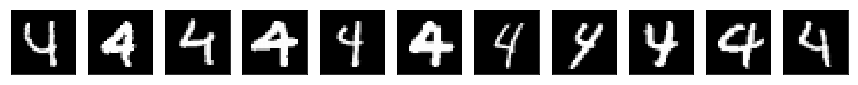

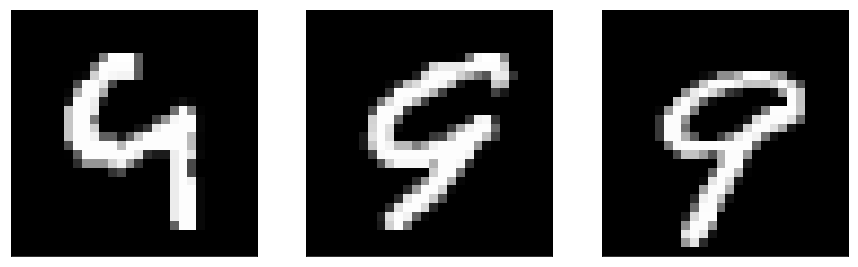

In [7]:
def P5():

### STUDENT START ###
    k = 1
    
    model = KNeighborsClassifier(n_neighbors=k)        
    model.fit(mini_train_data, mini_train_labels)   #fit model on mini training data and mini training labels
    dev_predicted_labels = model.predict(dev_data)     #predict dev labels based on dev data
    
    cmatrix = confusion_matrix(dev_labels, dev_predicted_labels)
    
    
    #showing 4s that get cnfused
    wrong_labels = dev_data[(dev_labels == str(4)) & (str(9) == dev_predicted_labels)]
    
    fig, ax = plt.subplots(1, len(wrong_labels), figsize = (15,15))
    for i in range(len(wrong_labels)):
        pix = wrong_labels[i].reshape((28,28))
        ax[i].imshow(pix, cmap = 'gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
    
   #showing the 9's that  get confused 
    wrong_labels_nine = dev_data[(dev_labels == str(9)) & (str(4) == dev_predicted_labels)]
    fig, ax = plt.subplots(1,len(wrong_labels_nine), figsize = (15,15))
    for i in range(len(wrong_labels_nine)):
        pix = wrong_labels_nine[i].reshape((28,28))
        ax[i].imshow(pix, cmap = 'gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    
    return cmatrix              
                
### STUDENT END ###

P5()

ANSWER: 
The model confuses the digits 4 and 9 the most. When we look at the confusion matrix, we can see that in the 5th row, 10th column (which corresponds to digits 4 and 9), there is an 11. This means that In the 10th row and 5th column, there is a 3. This means that 11 digits that are actually 4's are wrongly labeled as 9s. Furthermore, the confusion matrix shows that in the 10th row, 5th column (which corresponds to digits 9 and 4), there is a 3. This means that there are 3 actual 9s that are confused as 4s.  I show the 4s and 9s that get confused above.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [8]:
def P6(data):
    
### STUDENT START ###

    def neighbors_and_self(pixel):
        n = [pixel]
        for i in range(pixel[0]-1, pixel[0]+2):
            for j in range(pixel[1]-1, pixel[1] + 2):
                if (pixel[0] != i or pixel[1] != j) and -1 < pixel[0] < 28 and -1 < pixel[1] < 28 and 0 <= i <28 and 0 <= j < 28:
                    n.append([i,j])
        return n

    def gaussian(x):
        x_copy = x.copy()
        for i,data in enumerate(x):   
            for j in range(len(data)):
                nb = neighbors_and_self([i,j])
    
                p = 0
                counter = 1
                for k in nb:
                    r_val = k[0]
                    c_val= k[1]
                    total_pvalue = x[r_val][c_val]
                    p += total_pvalue
                    counter +=1
                x_copy[i][j] = p/counter         #put avg into corresponding point in the copy of x
        return x_copy
    
    all_blurred = []
    for i in range(len(data)):
        image = data[i].reshape(28,28)
        blurred = gaussian(image)
        all_blurred.append(blurred.reshape(784))

    return np.array(all_blurred)
  


### STUDENT END ###

P6(dev_data)


model = KNeighborsClassifier(n_neighbors=1)        
model.fit(mini_train_data, mini_train_labels)   #fit model on mini training data and mini training labels
dev_predicted_labels = model.predict(dev_data)     #predict dev labels based on dev data
class_report = classification_report(dev_labels, dev_predicted_labels, output_dict = True)  #produce precision, recall, and F1
print ("The performance for unfiltered train data and unfiltered dev data is " + str(class_report['accuracy']))
        

## Model where I Filter the training data but not the dev data
model = KNeighborsClassifier(n_neighbors=1)  
blurry_mini_train = P6(mini_train_data)
model.fit(blurry_mini_train, mini_train_labels)   
dev_pred_labels = model.predict(dev_data)     
class_report = classification_report(dev_labels, dev_pred_labels, output_dict=True)
acc_score = accuracy_score(dev_labels, dev_pred_labels) 
print ("Accuracy of filtered mini train data and unfiltered dev data: " + str(class_report['accuracy']))

### Model where I filter only the dev data
mod = KNeighborsClassifier(n_neighbors=1)  
blurry_dev_data = P6(dev_data)
mod.fit(mini_train_data, mini_train_labels)   
dev_p_labels = mod.predict(blurry_dev_data)     
class_report = classification_report(dev_labels, dev_p_labels, output_dict=True)
print ("Accuracy of filtering only dev data: " + str(class_report['accuracy']))  
                                                     
### Model where I filter both the train data and the dev data
m = KNeighborsClassifier(n_neighbors=1)                                                    
m.fit(blurry_mini_train, mini_train_labels)   
dev_p_labels_both_blurred = m.predict(blurry_dev_data)     
class_report = classification_report(dev_labels, dev_p_labels_both_blurred, output_dict=True)
print ("Accuracy of filtering both training and dev data: " + str(class_report['accuracy']))                               
                                      

The performance for unfiltered train data and unfiltered dev data is 0.884
Accuracy of filtered mini train data and unfiltered dev data: 0.911
Accuracy of filtering only dev data: 0.848
Accuracy of filtering both training and dev data: 0.905


The accuracy of training on blurred data and testing on unblurred data is pretty high at 0.903. This makes sense because training on blurred data makes the model train on more general data so that when it tests on data that is more specific and clearer, it is easier for the model to make predictions.  When we blurred just the dev data, the model did worse because it was trained on more specific data, so when it tests on more generalized data, it has a harder time accurately predicting the correct labels. Finally, when the model blurs both the training and the dev data, it does pretty well, because it is easier to test on data that is just as general as the data it was trained on.

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
from sklearn.preprocessing import binarize

def P7():
    
### STUDENT START ###
    
    binarized_train_data = binarize(mini_train_data, threshold = 0.5, copy = False)
    binarized_dev_data = binarize(dev_data, threshold = 0.5, copy = False)
    
    
    #bernoulli model
    classifier = BernoulliNB(binarize = 0.5)
    classifier.fit(binarized_train_data, mini_train_labels)
    dev_predicted_labels_b = classifier.predict(binarized_dev_data)
     
    class_report = classification_report(dev_labels, dev_predicted_labels_b, output_dict=True)
    print ("Bernoulli model accuracy: " + str(class_report['accuracy']))
    

    #multinomial model
    def bucket(dataset):
        zero = np.where(dataset < 0.33, 0, dataset)
        two = np.where(zero >= 0.66, 2, zero)
        one = np.where((two >= 0.33) & (two < 0.66), 1, two)
        
        
        return one

    bucketed_train_data = bucket(mini_train_data)
    bucketed_dev_data = bucket(dev_data)
        
    classifier = MultinomialNB()
    classifier.fit(bucketed_train_data, mini_train_labels)
    dev_predicted_labels_m = classifier.predict(bucketed_dev_data)
     
    class_report = classification_report(dev_labels, dev_predicted_labels_m, output_dict=True)
    print ("Multinomial model accuracy: " + str(class_report['accuracy']))
    

    
### STUDENT END ###

P7()

Bernoulli model accuracy: 0.819
Multinomial model accuracy: 0.813


ANSWER:  The multinomial model does not improve the results. The reason for this is because digits have mostly white and black pixels, but there are not very many grey pixels. Therefore, mapping pixels values to represent grey confuses the model instead of helping it to generalize. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [10]:
def P8(alphas):

### STUDENT START ###
    binarized_model = BernoulliNB()
    mod = GridSearchCV(binarized_model, param_grid = alphas, return_train_score = True) #cross-val: train on different partitions of same dataset
    mod.fit(mini_train_data, mini_train_labels)
    return mod


### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

print(nb.cv_results_['mean_test_score'])
print("Best alpha = ", nb.best_params_)


C:\Users\chels\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.814 0.825 0.827 0.825 0.821 0.815 0.811 0.803 0.744]
Best alpha =  {'alpha': 0.001}


ANSWER:   The best value for alpha is 0.001. The accuracy when alpha is near 0 is 0.814. (NOTE: if I try the to get accuracy when alpha = 10e-11 then I get an error saying that alpha is to small). This is what I would expect because when alpha is equal to 0, there is no smoothing occurring.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

Model accuracy before fix: 0.611
Model accuracy after fix: 0.814


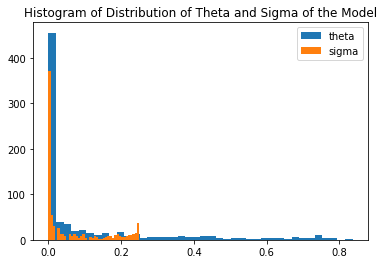

In [11]:
from sklearn.preprocessing import normalize
def P9():

### STUDENT END ###

    #gaussian model 
    model = GaussianNB()
    model.fit(mini_train_data, mini_train_labels)
    p_dev_labels = model.predict(dev_data)
    
    class_report = classification_report(dev_labels, p_dev_labels, output_dict= True)
    acc = class_report['accuracy']
    print ("Model accuracy before fix: " + str(acc))
    
    #look at the distributions of the theta and sigmas 
    plt.hist(model.theta_[7], label = "theta", bins = 40)
    plt.hist(model.sigma_[7], label = 'sigma', bins = 40)
    plt.legend()
    plt.title("Histogram of Distribution of Theta and Sigma of the Model")
    
    #fiixing our model
    fix_model = GaussianNB()
    fix_model.fit(mini_train_data, mini_train_labels)

    fix_model.theta_ = fix_model.theta_ +.1
    fix_model.sigma_ = fix_model.sigma_ + .01
    pred_dev_labels = fix_model.predict(dev_data)
    
    class_report = classification_report(dev_labels, pred_dev_labels, output_dict= True)
    acc = class_report['accuracy']
    print ("Model accuracy after fix: " + str(acc))

    
### STUDENT END ###

P9()

ANSWER:  When I look at the distribution of theta and sigma values, I realize there are many values at 0. To fix my model, I use LaPlace smoothing by adding 0.1 to my model's theta values and 0.01 to my model's sigma values.    I added small  LaPlace smoothing parameters because my theta and sigma values are very small (<1), so very small values helped me to get the best accuracy for my model.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

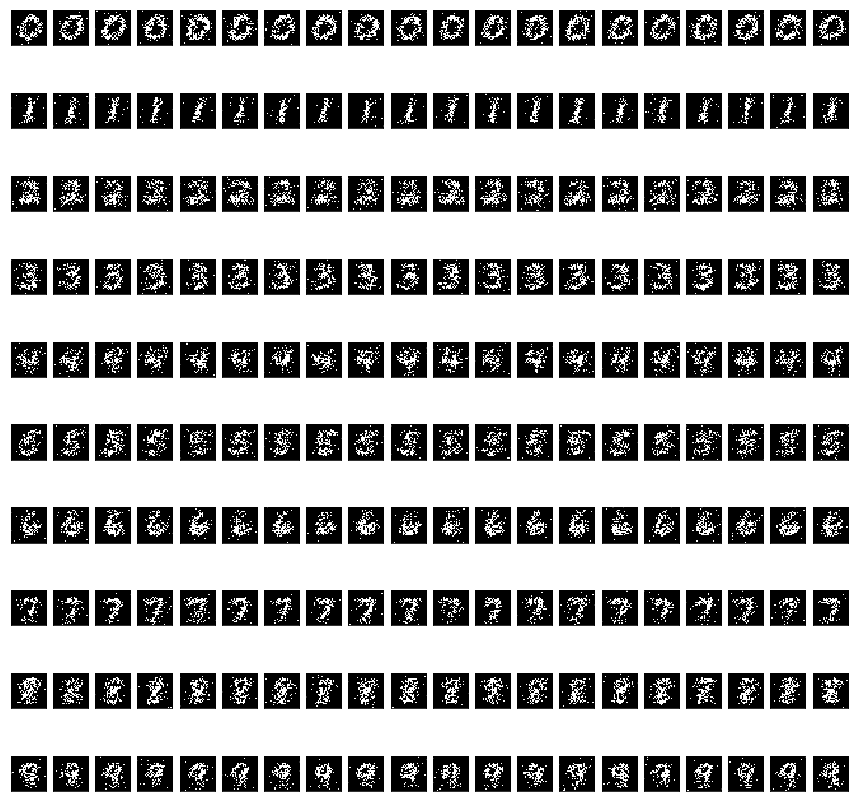

In [12]:
def P10(num_examples):

### STUDENT START ###
    fig, ax = plt.subplots(10,20, figsize = (15,15))
    
    binarized_train_data = binarize(mini_train_data, threshold = 0.5, copy = False)  #make each pixel 0 or 1 depending on above or below threshold
    binarized_dev_data = binarize(dev_data, threshold = 0.5, copy = False)
    
    #bernoulli mode
    classifier = BernoulliNB(binarize = 0.5)
    classifier.fit(binarized_train_data, mini_train_labels)
    estimated_probability = np.exp(classifier.feature_log_prob_)  #prob of each pixel being 0 or 1
    
       #if the random number is less than the estimated probability.
        
  
    for i in range(20):
        #data = pixels[mini_train_labels == str(i)]
        for j in range(10):  
            random_numbers = np.random.rand(10, 784)
            new_array = estimated_probability - random_numbers
            pixels = []
            for k in new_array:
                for m in k:
                    if m >=0:
                        pixels.append(1)
                    else:
                        pixels.append(0)
            pixels = np.array(pixels).reshape(10,784)
            pix = pixels[j].reshape((28,28))
            ax[j,i].imshow(pix, cmap = 'gray')
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
            
        

### STUDENT END ###

P10(20)

ANSWER:
The generated digit images are not nearly as clear as the training digit images. Within the white part of the generated digits, there are many black spaces, making the image look more like there are many white datapoints in the general shape of a digit rather than like an image of a digit. It is possible to determine what the digit should be from the general shape of the pixels, but the training digit images are a lot clearer than these images above.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
   
    ### STUDENT START ###
    binarized_dev_data = binarize(dev_data, threshold = 0.5, copy = False)
    binarized_train_data = binarize(mini_train_data, threshold = 0.5, copy = False)
    
    #bernoulli model
    classifier = BernoulliNB(alpha = .001)
    classifier.fit(binarized_train_data, mini_train_labels)
    predicted_probabilities = classifier.predict_proba(binarized_dev_data)  #predicts probabilities of label given data



    pred_label_from_prob = []
    maxs = []
    for row in predicted_probabilities: 
        max_prob = max(row)
        label = list(row).index(max_prob)   #this is the label that we predict from the max posterior prob
        maxs.append(max_prob)
        pred_label_from_prob.append(str(label))  #make them strings so we can compare to dev predicted labels
     
       

    index_bin = np.digitize(maxs, buckets, right = True) #gives index of the bucket. 

    for i,index in enumerate(index_bin):
        #estimate accuracy for each bin
        if dev_labels[i] == pred_label_from_prob[i]:
            correct[index] += 1
            total[index] += 1
        else:
            total[index] += 1

  
    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  36    accuracy = 0.389
p(pred) is 0.9000000000000 to 0.9990000000000    total =  90    accuracy = 0.444
p(pred) is 0.9990000000000 to 0.9999900000000    total =  69    accuracy = 0.565
p(pred) is 0.9999900000000 to 0.9999999000000    total =  67    accuracy = 0.672
p(pred) is 0.9999999000000 to 0.9999999990000    total =  50    accuracy = 0.820
p(pred) is 0.9999999990000 to 0.9999999999900    total =  72    accuracy = 0.903
p(pred) is 0.9999999999900 to 0.9999999999999    total =  66    accuracy = 0.894
p(pred) is 0.9999999999999 to 1.0000000000000    total = 550    accuracy = 0.955


ANSWER:  My Bernoulli Naive Bayes model generally has a lower accuracy than the posterior probability of the predicted class.  There is also a positive correlation between the posterior probabilities and the accuracies. Therefore, I would characterize the calibration for this model as weakly calibrated. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [14]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()